In [1]:
import dedalus_sphere.zernike as Zernike

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=3,suppress=True)

def chop(X,eps=1e-9):
    M = np.copy(X)
    w = np.where(np.abs(X) < eps)
    M[w] = 0
    print(M)
    print()

def good(X,nkl):
    print(np.max(np.abs(X(*nkl).A)) < 1e-10)
    print()    

In [16]:
d,n,k = 3,15,0

z,w = zernike.quadrature(d,n,k=k)

print(np.sum(w))

r = np.sqrt((1+z)/2)

0.3333333333333331


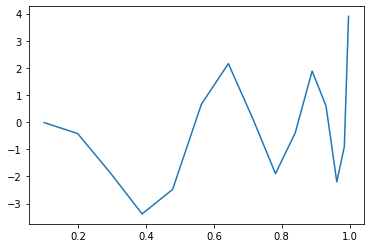

In [17]:
ell = 5
Q = zernike.polynomials(d,10,k,ell,z)

plt.plot(r,Q[5])

In [19]:
chop(Q @ np.diag(w) @ Q.T)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]



In [13]:
dim = 3

nkl = n,k,l = 10,1,1

D = zernike.operator(dim,'D')
R = zernike.operator(dim,'R')
E = zernike.operator(dim,'E')


z,w = zernike.quadrature(dim,n,k)

r = np.sqrt((1+z)/2)

Q = lambda dn,dk,dl : zernike.polynomials(dim,n+dn,k+dk,l+dl,z).T
d = lambda Op: Op.codomain[:3]
right = lambda Op: Op(*nkl)
left  = np.diag

err = lambda thing: print(np.max(np.abs(thing)) < 1e-10)


err(      left(r) @ Q(0,0,0) -  Q( *d( R(-1) )) @ right( R(-1) ) )
err(      left(r) @ Q(0,0,0) -  Q( *d( R(+1) )) @ right( R(+1) ) )
err(                Q(0,0,0) -  Q( *d( E(+1) )) @ right( E(+1) ) )
err( left(1-r**2) @ Q(0,0,0) -  Q( *d( E(-1) )) @ right( E(-1) ) )

True
True
True
True


In [6]:
nkl = n,k,ell = 10,1,3

chop( ( E(-1) @ E(+1)  + R(-1) @ R(+1) )(n,k,l).A )

good( R(-1) * D(+1) + 2*E(+1) , nkl)
good( R(+1) * D(-1) + 2*E(+1) , nkl)

good( E(-1) * D(-1) - 2*R(-1) ,nkl)

good( E(-1) * D(+1) - 2*R(+1) ,nkl)

good( E(+1) * D(+1) ,nkl)

good( D(-1) * D(+1) ,nkl)

good( R(-1) * R(+1) ,nkl)

good( R(+1) * D(+1) ,nkl)

good( R(-1) * D(-1) ,nkl)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

True

True

True

True

True

True

True

True

True

